In [27]:
from numpy import loadtxt
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import pandas as pd
import time
import json
import os 
import shap

import matplotlib.pyplot as plt 

os.chdir('/Users/adrianharris/Desktop/Messy-Data-Project')

path = os.getcwd()

In [28]:
dataset = pd.read_csv('Data/feature_eng_below_5_99s_data.csv')

In [29]:
df = dataset.drop("player", axis=1)

df.head()


,level_overall,level_atk,level_def,level_str,level_constiution,level_range,level_prayer,level_magic,level_cooking,level_wood_cutting,...,total_xp_overall,cluster,Basic_member_pure,Obby_Mauler_Pure,Black_Pure,Turmoil_Proselyte_Pure,Barrows_Pure,Anti_Pure,Summoning_Tank_Defence,Skiller_Pure
0,1521,65,65,63,65,57,55,64,74,65,...,22665814,1,0,0,0,0,0,0,0,0
1,755,64,1,81,74,1,52,30,38,36,...,4669413,1,0,0,0,0,0,0,0,0
2,335,64,41,36,40,57,18,1,1,1,...,784234,1,0,0,0,0,0,0,0,0
3,659,64,62,64,64,44,24,47,1,80,...,3889038,1,0,0,0,0,0,0,0,0
4,1087,64,64,64,65,49,46,50,61,56,...,3695045,1,0,0,0,0,0,0,0,0


In [30]:
# split data into X and y


X = df.loc[:, ~df.columns.isin(['total_xp_overall', 'level_overall'])]
Y = df.loc[:, 'total_xp_overall']

# Training and Testing data
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [31]:
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)
score = xgbr.score(X_train, y_train) 
score

0.999259314808106

In [32]:
scores = cross_val_score(xgbr,X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.91


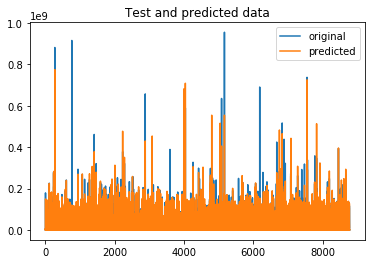

In [33]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


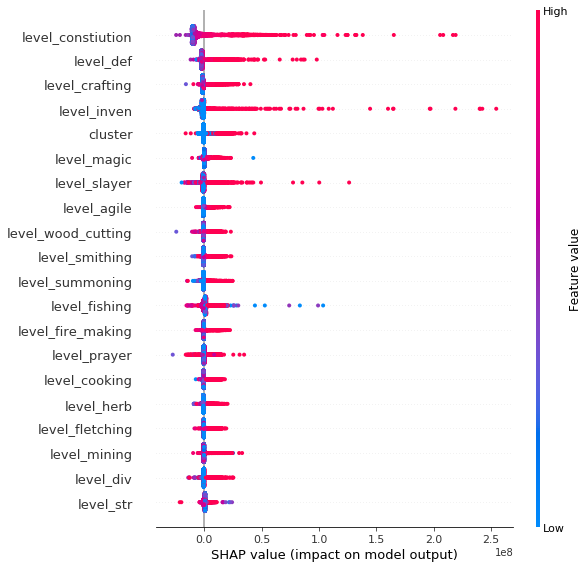

In [34]:
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(X_test)
plot = shap.summary_plot(shap_values,X_test)